I think a good tool for this problem is Monte Carlo simulation. While this term can encompass a variety of techniques, the core feature is the use of random sampling and iteration. Typically, you would break down a problem into a series of variables, then assign some kind of probability distribution to each variable. While this might sound mathematically complex (and it can become so), in practice, folks will often devise a simple, discrete distribution using judgment. You would then initiate the simulation by randomly sampling from each distribution, then combining those samples using whatever formula relates them, then save that result. You repeat this process n times (e.g. 1mm times), then aggregate the results in an array.

In terms of visualization, you can then represent the results as a histogram. While the simulation process itself may be confusing to a manager with a non-quantitative background, the results can actually be presented quite intuitively. We can highlight certain quantiles within the resulting distribution, and present them as probability or odds (e.g. a 1-in-100 outcome).

Let's apply this to the example from the prompt. Let's assume that total cost equals the product of project duration, number of employees, and salary. We analyze some past data and find that:
-duration (in days) is normally distributed with mean 50 and standard deviation 10; 
-required employees is uniformally distributed between 2 and 5; and
-annual salary is normally distributed with mean $72k and sd $10k.
We then estimate 1 FTE-month as $7k ($84k annual average salary / 12 months). Finally, we assume that 1 month = 4 weeks = 30 days.

We can spin up a quick simulation to generate a distribution of potential FTE costs.

In [1]:
import numpy as np

n = 100000
fte_month = 7

duration_months = np.random.normal(50, 10, n) / 30
num_employees = np.random.randint(2, 6, n)
salary_per_month = np.random.normal(72, 10, n) / 12
total_cost = (duration_months * num_employees * salary_per_month)

results = np.array([duration_months, num_employees, salary_per_month, total_cost]).T
successes = results[(results[:,0] <= 1.5) & (results[:,3] <= (fte_month * 3))]

We can then plot our results and present a probability of meeting the manager's request. Typically, I would consider a histogram to show the results, but since we're dealing with two distributions (i.e. cost in fte_months and duration), we can use a scatter plot and some shading. The area in blue indicates the number of times we succeed.

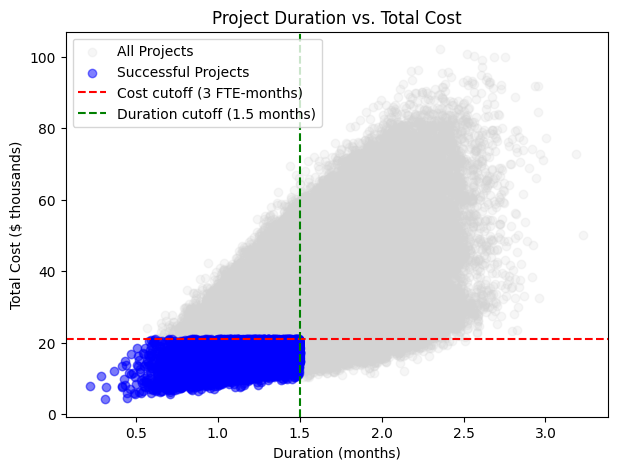

In 100,000 trials, there were 10,311 cases where the project was completed 
within 1.5 months and cost no more than 3 FTE-months. This equates to a 
probability of 10.31%.


In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))

plt.scatter(results[:,0], results[:,3], alpha=0.2, color='lightgrey', label='All Projects')
plt.scatter(successes[:,0], successes[:,3], color='blue', alpha=0.5, label='Successful Projects')

plt.axhline(y=fte_month * 3, color='red', linestyle='--', label='Cost cutoff (3 FTE-months)')
plt.axvline(x=1.5, color='green', linestyle='--', label='Duration cutoff (1.5 months)')

plt.xlabel('Duration (months)')
plt.ylabel('Total Cost ($ thousands)')
plt.title('Project Duration vs. Total Cost')
plt.legend()

plt.show()

print(
    f'In {len(results):,} trials, there were {len(successes):,} cases where '
    f'the project was completed \nwithin 1.5 months and cost no more than 3 FTE-months. '
    f'This equates to a \nprobability of {len(successes) / len(results)*100:.2f}%.'
)

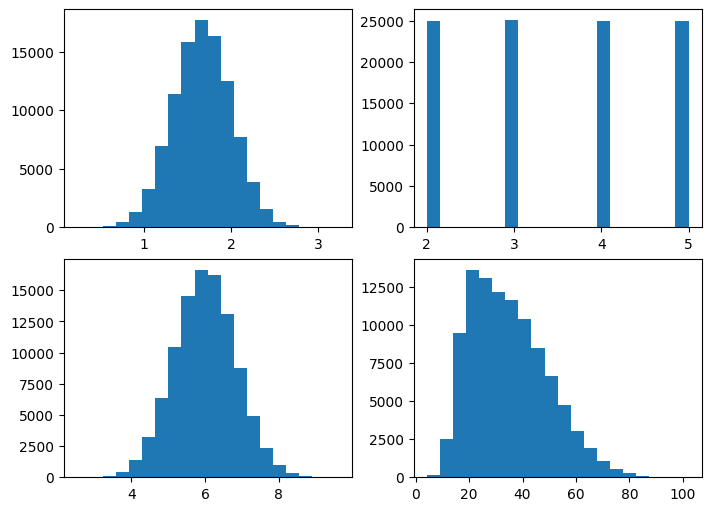

In [3]:
fig, axes = plt.subplots(2, 2, figsize=(7, 5), layout='constrained')

for idx, ax in enumerate(axes.ravel()):
    ax.hist(results[:,idx], bins=20)
plt.show()